In [1]:
import os
import tarfile
os.chdir('/mnt/batch/tasks/shared/LS_root/mounts/clusters/yannnotebookvm/code/Users/yann.hallouard/Hackathon-Booster_Waykonect')
os.getcwd()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/yannnotebookvm/code/Users/yann.hallouard/Hackathon-Booster_Waykonect'

In [2]:
my_tar = tarfile.open("train.tar")
my_tar.extractall('./')
my_tar.close()

KeyboardInterrupt: 

In [ ]:
my_tar = tarfile.open("test.tar")
my_tar.extractall('./')
my_tar.close()

In [6]:
len(os.listdir('./test'))

2944

In [45]:
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import UtilsFunction as UF

In [46]:
with open('export_project_2812343.json') as json_file:
    data = json.load(json_file)['images']

In [20]:
bboxes = []
size = []
for image in tqdm(data):
    labels = image['labels'][0]['bbox']
    bboxes.append([image['image_name'],
                   labels[0],
                   labels[1],
                   labels[2],
                   labels[3]])
    size.append([image['image_name'],
                image['width'],
                image['height']])

bboxes = pd.DataFrame(np.array(bboxes))
bboxes.columns = ['images_name', 'X_top_left', 'Y_top_left', 'X_bottom_right', 'Y_bottom_right']
bboxes.to_csv('bboxes.csv', index=False)
size = pd.DataFrame(np.array(size))
size.columns = ['images_name', 'width', 'height']
size.to_csv('size.csv', index=False)

100%|██████████| 616/616 [00:00<00:00, 400820.86it/s]


In [21]:
size.iloc[np.where(size['images_name']=="id_ImgChallenge_13959.JPG")[0][0],:]

images_name    id_ImgChallenge_13959.JPG
width                                567
height                               425
Name: 10, dtype: object

In [22]:
# -----------------------
# Data train Import
# -----------------------
df = pd.read_csv("./bboxes.csv", sep=',')
Y_train = df.iloc[:,1:].values

image_name = df['images_name']

np.save('filenames.npy', image_name)
np.save('y_train.npy', Y_train)

filenames_shuffled, Y_train_shuffled = shuffle(image_name, Y_train)

# saving the shuffled file.
np.save('y_train_shuffled.npy', Y_train_shuffled)
np.save('filenames_shuffled.npy', filenames_shuffled)

filenames_shuffled_numpy = np.array(filenames_shuffled)

X_train_filenames, X_val_filenames, y_train, y_val = train_test_split(
    filenames_shuffled_numpy, Y_train_shuffled, test_size=0.3, random_state=1)

X_val_filenames, X_test_filenames, y_val, y_test = train_test_split(
     X_val_filenames, y_val, test_size=0.2, random_state=1)

print(X_train_filenames.shape) 
print(y_train.shape)           

print(X_val_filenames.shape)   
print(y_val.shape)     

print(X_test_filenames.shape)   
print(y_test.shape)   

# You can save these files as well. As you will be using them later for training and validation of your model.
np.save('X_train_filenames.npy', X_train_filenames)
np.save('y_train.npy', y_train)

np.save('X_val_filenames.npy', X_val_filenames)
np.save('y_val.npy', y_val)

np.save('X_test_filenames.npy', X_test_filenames)
np.save('y_test.npy', y_test)

(431,)
(431, 4)
(148,)
(148, 4)
(37,)
(37, 4)


In [23]:
Builder_train = UF.DataBuilding(X_train_filenames, y_train, size)
Builder_val   = UF.DataBuilding(X_val_filenames, y_val, size)
Builder_test   = UF.DataBuilding(X_test_filenames, y_test, size)

X_train, y_train = Builder_train.__getitem2__(title=431, 
                                             path='./train/',
                                             image_shape=(224, 224, 3),
                                             name='train_%d_equi.pickle')
X_val, y_val     = Builder_val.__getitem2__(title=148, 
                                           path='./train/',
                                           image_shape=(224, 224, 3),
                                           name='val_%d_equi.pickle')
X_test, y_test   = Builder_test.__getitem2__(title=37, 
                                           path='./train/',
                                           image_shape=(224, 224, 3),
                                           name='test_%d_equi.pickle')

100%|██████████| 37/37 [00:00<00:00, 1896.62it/s]


In [34]:
y_train*224

array([[ 96.5, 138.5,  21. ,  19. ],
       [104.5, 165.5,  39. ,  23. ],
       [121.5,  98. ,  97. ,  38. ],
       ...,
       [111. , 119.5, 184. ,  57. ],
       [111.5, 105. , 207. ,  54. ],
       [102. , 161. ,  62. ,  18. ]])

In [25]:
from UMask.UMask import Poly2Mask
from shapely.geometry import Polygon, MultiPolygon, LinearRing
from skimage.io import imread
from skimage.transform import resize

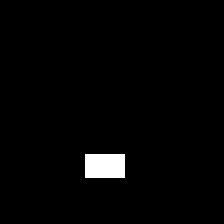

In [43]:
i = 1
t = 224
x = (y_train[i][0]-y_train[i][2]/2)*t
X = (y_train[i][0]+y_train[i][2]/2)*t
y = (y_train[i][1]-y_train[i][3]/2)*t
Y = (y_train[i][1]+y_train[i][3]/2)*t
Coords = [[x, y], [x, Y], [X,Y], [X, y]]
Poly2Mask(raw_mask=np.zeros((224, 224)), polygons=Polygon(Coords).wkt)

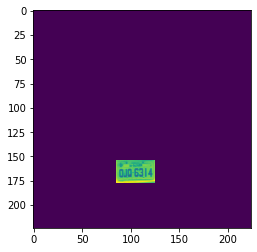

In [44]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[i,:,:,0]*Poly2Mask(raw_mask=np.zeros((224, 224)), polygons=Polygon(Coords).wkt))
#plt.imshow(X_train[i,:,:,0])

In [13]:
size.iloc[np.where(size['images_name']=='id_ImgChallenge_16266.jpg')[0][0],:]

images_name    id_ImgChallenge_16266.jpg
width                               2736
height                              3648
Name: 607, dtype: object

In [ ]:
im = imread('./train/'+'id_ImgChallenge_16266.jpg')
p = list(df.iloc[np.where(size['images_name']=='id_ImgChallenge_16266.jpg')[0][0],1:].values)
s = size.iloc[np.where(size['images_name']=='id_ImgChallenge_16266.jpg')[0][0],1:]

x = p[0]*224/int(s['width'])
X = p[2]*224/int(s['width'])
y = p[1]*224/int(s['height'])
Y = p[3]*224/int(s['height'])

Coords = [[x, y], [x, Y], [X,Y], [X, y]]
plt.imshow(resize(im[:,:,0], (224,224))*Poly2Mask(raw_mask=np.zeros((224,224)), polygons=Polygon(Coords).wkt))

# Data for OCR

In [2]:
import json
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import UtilsFunction as UF
from skimage.transform import resize, rescale, rotate
from skimage.io import imread
import matplotlib.pyplot as plt
from model import PlaqueFinder
from copy import deepcopy as dp

Using TensorFlow backend.


In [44]:
plate = pd.read_csv('Images_distribution.csv', sep=';')
df = pd.read_csv('DataSet_Train_.csv', sep=';')

image_name = plate.iloc[np.where(plate['Type of Picture'].values=='Plate only')[0],:]
pd.merge(df, image_name, on=['id'])

,id,Plate Number,Type of Picture
0,id_ImgChallenge_00001.png,'000F1000',Plate only
1,id_ImgChallenge_00002.png,'0C00501',Plate only
2,id_ImgChallenge_00003.png,'0CM2999',Plate only
3,id_ImgChallenge_00004.png,'0CN2627',Plate only
4,id_ImgChallenge_00005.png,'0FDN2400',Plate only
...,...,...,...
11150,id_ImgChallenge_13940.png,'DT612BC',Plate only
11151,id_ImgChallenge_13941.png,'FMR4437',Plate only
11152,id_ImgChallenge_13942.png,'LL435JG',Plate only
11153,id_ImgChallenge_13943.png,'SI625BC',Plate only


In [45]:
plate = pd.read_csv('Images_distribution.csv', sep=';')
plate

,id,Type of Picture
0,id_ImgChallenge_00001.png,Plate only
1,id_ImgChallenge_00002.png,Plate only
2,id_ImgChallenge_00003.png,Plate only
3,id_ImgChallenge_00004.png,Plate only
4,id_ImgChallenge_00005.png,Plate only
...,...,...
14710,id_ImgChallenge_15949.jpg,Car with plate
14711,id_ImgChallenge_16200.jpg,Car with plate
14712,id_ImgChallenge_16243.jpg,Car with plate
14713,id_ImgChallenge_16266.jpg,Car with plate


In [49]:
# -----------------------
# Data train Import
# -----------------------
plate = pd.read_csv('Images_distribution.csv', sep=';')
df = pd.read_csv('DataSet_Train_.csv', sep=';')

image_name = plate.iloc[np.where(plate['Type of Picture'].values=='Car with plate')[0],:]
new_df = pd.merge(df, image_name, on=['id'])

image_name = new_df['id'].values

Y_train = new_df['Plate Number'].values

np.save('filenames.npy', image_name)
np.save('y_train.npy', Y_train)

filenames_shuffled, Y_train_shuffled = shuffle(image_name, Y_train)

# saving the shuffled file.
np.save('y_train_shuffled.npy', Y_train_shuffled)
np.save('filenames_shuffled.npy', filenames_shuffled)

filenames_shuffled_numpy = np.array(filenames_shuffled)

X_train_filenames, X_val_filenames, y_train, y_val = train_test_split(
    filenames_shuffled_numpy, Y_train_shuffled, test_size=0.3, random_state=1)

X_val_filenames, X_test_filenames, y_val, y_test = train_test_split(
     X_val_filenames, y_val, test_size=0.2, random_state=1)

print(X_train_filenames.shape) 
print(y_train.shape)           

print(X_val_filenames.shape)   
print(y_val.shape)     

print(X_test_filenames.shape)   
print(y_test.shape)   

# You can save these files as well. As you will be using them later for training and validation of your model.
np.save('X_train_filenames_ocr.npy', X_train_filenames)
np.save('y_train_ocr.npy', y_train)

np.save('X_val_filenames_ocr.npy', X_val_filenames)
np.save('y_val_ocr.npy', y_val)

np.save('X_test_filenames_ocr.npy', X_test_filenames)
np.save('y_test_ocr.npy', y_test)

(431,)
(431,)
(148,)
(148,)
(37,)
(37,)


In [50]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
alphabet_num = {}
i = 0
for tocken in alphabet:
    alphabet_num[str(tocken)] = i
    i+=1
alphabet_num['blanck'] = i
alphabet_num

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 '0': 26,
 '1': 27,
 '2': 28,
 '3': 29,
 '4': 30,
 '5': 31,
 '6': 32,
 '7': 33,
 '8': 34,
 '9': 35,
 'blanck': 36}

In [51]:
def encoder(Y=None, Alpha=None, num=None, length=None):
    encoded = (np.ones((Y.shape[0], length))*num['blanck']).astype(int)
    label_length = []
    for i in range(Y.shape[0]):
        label_length.append(len(Y[i])-2)
        word = []
        for j in range(len(Y[i])-2):
            if Y[i][j+1] in num:
                word.append(int(num[Y[i][j+1]]))
        encoded[i, :len(word)] = word
        
    return encoded, label_length

In [52]:
labels, label_length = encoder(Y=y_train, Alpha=alphabet, num=alphabet_num, length=10)

In [53]:
PF = PlaqueFinder(shape=(224, 224, 3), weight = 'model/InceptionResNetV2.h5', loss='iou')

Loaded model from disk


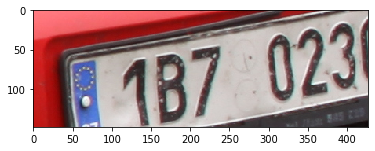

In [18]:
file = X_train_filenames[4229]
im = imread('./train/' + file)
size = im.shape[:2]
im_true = dp(im)
im = np.expand_dims(resize(im, (224, 224, 3)), axis=0)
pred = PF.predict(im)
xh = pred[0][0]
yh = pred[0][1]
w = pred[0][2] 
h = pred[0][3] 

x = max(0, int((xh - w/2)*size[1]))
X = min(size[1], int((xh + w/2)*size[1]))
y = max(0, int((yh - h/2)*size[0]))
Y = min(size[0], int((yh + h/2)*size[0]))

new_im = im_true[y:Y+1, x:X+1, :]

plt.imshow(new_im)

In [54]:
#X_train_filenames = np.delete(X_train_filenames,6205)

filesname = dp(X_train_filenames)
#filesname = np.delete(filesname,6205)
X_train = np.zeros((len(filesname),128, 64, 3))
i = 0
index = []
for file in tqdm(filesname):
    im = imread('./train/' + file)
    size = im.shape[:2]
    if size[1]<200 and size[0]<=size[1]/2:
        X_train[i, :, :, :] = resize(rotate(im, 90, resize=True), (128, 64, 3))
    else:
        im_true = dp(im)
        im = np.expand_dims(resize(im, (224, 224, 3)), axis=0)
        pred = PF.predict(im)
        xh = pred[0][0]
        yh = pred[0][1]
        w = pred[0][2] 
        h = pred[0][3] 

        x = max(0, int((xh - w/2)*size[1]))
        X = min(size[1], int((xh + w/2)*size[1]))
        y = max(0, int((yh - h/2)*size[0]))
        Y = min(size[0], int((yh + h/2)*size[0]))


        new_im = im_true[y:Y+1, x:X+1, :]
        
        X_train[i, :, :, :] = resize(rotate(new_im, 90, resize=True), (128, 64, 3))
        
        index.append(i)
        
    i += 1


labels, label_length = encoder(Y=y_train, Alpha=alphabet, num=alphabet_num, length=10)

#labels = np.delete(labels, (6205,), 0)
#labels = np.delete(labels, (6582,), 0)
#label_length.remove(label_length[6205])
#label_length.remove(label_length[6582])

inputs = {'train_input': X_train,
            'the_labels': np.array(labels),
                  'input_length': (np.ones(len(filesname))*30).astype(int),
                  'label_length': np.array(label_length)
                  }
outputs = {'ctc': np.zeros([len(filesname)])}

import pickle
with open('train_ocr_%d_CWP.pickle'%(len(X_train)), 'wb') as f:
    pickle.dump([inputs, outputs], f, protocol=4)

In [56]:
filesname = dp(X_val_filenames)
#filesname = np.delete(filesname,1526)
#filesname = np.delete(filesname,1525)
#filesname = np.delete(filesname,1524)
#filesname = np.delete(filesname,1521)
X_val = np.zeros((len(filesname),128, 64, 3))
i = 0
index = []
for file in tqdm(filesname):
    im = imread('./train/' + file)
    size = im.shape[:2]
    if size[1]<200 and size[0]<=size[1]/2:
        X_val[i, :, :, :] = resize(rotate(im, 90, resize=True), (128, 64, 3))
    else:
        im_true = dp(im)
        im = np.expand_dims(resize(im, (224, 224, 3)), axis=0)
        pred = PF.predict(im)
        xh = pred[0][0]
        yh = pred[0][1]
        w = pred[0][2] 
        h = pred[0][3] 

        x = max(0, int((xh - w/2)*size[1]))
        X = min(size[1], int((xh + w/2)*size[1]))
        y = max(0, int((yh - h/2)*size[0]))
        Y = min(size[0], int((yh + h/2)*size[0]))


        new_im = im_true[y:Y+1, x:X+1, :]
        
        X_val[i, :, :, :] = resize(rotate(new_im, 90, resize=True), (128, 64, 3))
        
        index.append(i)
        
    i += 1

labels, label_length = encoder(Y=y_val, Alpha=alphabet, num=alphabet_num, length=10)

#labels = np.delete(labels, (1526,), 0)
#labels = np.delete(labels, (1521,), 0)
#labels = np.delete(labels, (1521,), 0)
#label_length.remove(label_length[1526])
#label_length.remove(label_length[1521])
#label_length.remove(label_length[1521])

inputs = {'train_input': X_val,
            'the_labels': np.array(labels),
                  'input_length': (np.ones(len(filesname))*30).astype(int),
                  'label_length': np.array(label_length)
                  }
outputs = {'ctc': np.zeros([len(filesname)])}

import pickle
with open('val_ocr_%d.pickle'%(len(X_val)), 'wb') as f:
    pickle.dump([inputs, outputs], f, protocol=4)  

In [57]:
filesname = dp(X_test_filenames)

#filesname = np.delete(filesname,1525)
#filesname = np.delete(filesname,1524)

X_test = np.zeros((len(filesname),128, 64, 3))
i = 0
index = []
for file in tqdm(filesname):
    im = imread('./train/' + file)
    size = im.shape[:2]
    if size[1]<200 and size[0]<=size[1]/2:
        X_test[i, :, :, :] = resize(rotate(im, 90, resize=True), (128, 64, 3))
    else:
        im_true = dp(im)
        im = np.expand_dims(resize(im, (224, 224, 3)), axis=0)
        pred = PF.predict(im)
        xh = pred[0][0]
        yh = pred[0][1]
        w = pred[0][2] 
        h = pred[0][3] 

        x = max(0, int((xh - w/2)*size[1]))
        X = min(size[1], int((xh + w/2)*size[1]))
        y = max(0, int((yh - h/2)*size[0]))
        Y = min(size[0], int((yh + h/2)*size[0]))


        new_im = im_true[y:Y+1, x:X+1, :]
        
        X_test[i, :, :, :] = resize(rotate(new_im, 90, resize=True), (128, 64, 3))
        
        index.append(i)
        
    i += 1

labels, label_length = encoder(Y=y_test, Alpha=alphabet, num=alphabet_num, length=10)

inputs = {'train_input': X_test,
            'the_labels': np.array(labels),
                  'input_length': (np.ones(len(filesname))*30).astype(int),
                  'label_length': np.array(label_length)
                  }
outputs = {'ctc': np.zeros([len(filesname)])}

import pickle
with open('test_ocr_%d_CWP.pickle'%(len(X_test)), 'wb') as f:
    pickle.dump([inputs, outputs], f, protocol=4)

In [1]:
plt.imshow(X_test[2943])

NameError: name 'plt' is not defined

In [44]:
from model import PlaqueOCR
t = PlaqueOCR(shape=(128, 64, 3), shapes=[10], weight=None, weights=None)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
train_input (InputLayer)        [(None, 64, 128, 3)] 0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 16, 37)       4886293     train_input[0][0]                
__________________________________________________________________________________________________
the_labels (InputLayer)         [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_length (InputLayer)       [(None, 1)]          0                                            
____________________________________________________________________________________________

In [45]:
t.train(x_train=inputs, 
        y_train=outputs,
        batch_size=2,
        epochs=10,
        validation_data=None)

Train on 600 samples
Epoch 1/10
484/600 [=======================>......] - ETA: 17s - loss: 308.5225

KeyboardInterrupt: 

In [20]:
np.argmax(t.predict(X_train)[1], axis=1)

array([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33])

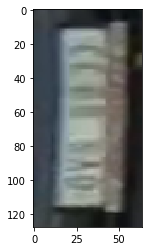

In [21]:
plt.imshow(X_train[0])

# Extraction

In [5]:
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import UtilsFunction as UF
from skimage.transform import resize, rescale, rotate
from skimage.io import imread
import matplotlib.pyplot as plt
from model import PlaqueFinder
from copy import deepcopy as dp
import pickle

In [10]:
PF = PlaqueFinder(shape=(224, 224, 3), weight = 'model/InceptionResNetV2.h5', loss='iou')

Loaded model from disk


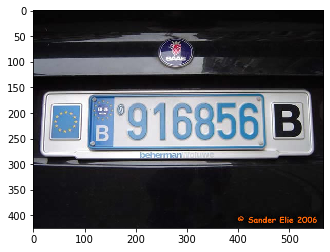

In [79]:
filesname = os.listdir('./test/')
im_true = resize(imread('./test/' + filesname[2727]), (224, 224, 3))
im_true = imread('./test/' + filesname[2830])
size = im_true.shape[:2]
plt.imshow(im_true)
im = np.expand_dims(resize(im_true, (224, 224, 3)), axis=0)
pred = PF.predict(im)
xh = pred[0][0]
yh = pred[0][1]
w = pred[0][2] 
h = pred[0][3] 

x = int((xh - w/2)*size[1])
X = int((xh + w/2)*size[1])
y = int((yh - h/2)*size[0])
Y = int((yh + h/2)*size[0])

new_im = im_true[y:Y+1, x:X+1, :]

In [80]:
x, X, y, Y

(89, 461, 160, 270)

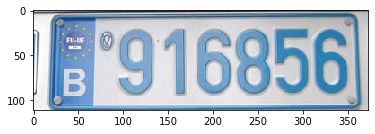

In [81]:
plt.imshow(new_im)

In [99]:
plate = pd.read_csv('Images_distribution.csv', sep=';')
df = pd.read_csv('Results_to_submit.csv', sep=';')
df = pd.merge(df, plate, on=['id'])

filesname = df['id'].values
X_test = np.zeros((len(filesname),128, 64, 3))
i = 0
index = []
for file in tqdm(filesname):
    im = imread('./test/' + file)
    size = im.shape[:2]
    if size[0]<=size[1]/2:
        X_test[i, :, :, :] = resize(rotate(im, 90, resize=True), (128, 64, 3))
    else:
        im_true = dp(im)
        im = np.expand_dims(resize(im, (224, 224, 3)), axis=0)
        pred = PF.predict(im)
        xh = pred[0][0]
        yh = pred[0][1]
        w = pred[0][2] 
        h = pred[0][3] 

        x = int((xh - w/2)*size[1])
        X = int((xh + w/2)*size[1])
        y = int((yh - h/2)*size[0])
        Y = int((yh + h/2)*size[0])

        new_im = im_true[y:Y+1, x:X+1, :]
        
        X_test[i, :, :, :] = resize(rotate(new_im, 90, resize=True), (128, 64, 3))
        
        index.append(i)
        
    i += 1
    
with open('data_ocr/to_pred_ocr_%d_v2.pickle'%(len(X_test)), 'wb') as f:
    pickle.dump([X_test, filesname, df['Type of Picture'].values], f, protocol=4)

In [6]:
with open('data_ocr/to_pred_ocr_2944.pickle', 'rb') as f:
    X_test = pickle.load(f)[0]

In [ ]:
plt.imshow(X_test[29])

In [86]:
import pickle
with open('data_ocr/to_pred_ocr_%d_v2.pickle'%(len(X_test)), 'wb') as f:
    pickle.dump([X_test], f, protocol=4)